CANCER_PREDICTION (Predefined data)

In [3]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  #true or false
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 

----------------DATA---------------

In [ ]:
data = load_breast_cancer()
df = pd.DataFrame(data.data,columns=data.feature_names)
df['target'] =  data.target #result #0-malignant 1-benign
print(df.head())

In [5]:
#keep only 5 important features + target
df_small = df[['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'target']] #only a few features

In [6]:
#SPLIT DATA
X = df_small.drop(columns=["target"])   #REMOVE target COLUMN AND RAMAIN FEATURES
y = df_small["target"] #ONLY target COLUMN

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 , stratify=y)   

MODEL CREATION

In [7]:
#TRAIN LOGISTIC REGRESSION MODEL
model = LogisticRegression()   #Algorithm loaded 
model.fit(X_train, y_train)    #train the model with training data


C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [8]:
#EVALUATE THE MODEL
y_pred = model.predict(X_test)  #predicted values
y_prob = model.predict_proba(X_test)[:,1] #probability of being 1
print("Accuracy:", accuracy_score(y_test, y_pred)) 
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9210526315789473

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90        42
           1       0.96      0.92      0.94        72

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



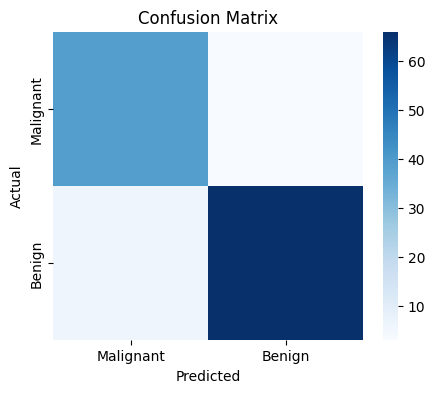

In [9]:
#CONFUSION MATRIX

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm,cmap="Blues",
            xticklabels=["Malignant","Benign"], yticklabels=["Malignant","Benign"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



In [ ]:
# 5. User Input Prediction
print("\n--- Breast Cancer Prediction ---")

mean_radius = float(input("Enter mean radius (e.g. 14.5): "))
mean_texture = float(input("Enter mean texture (e.g. 20.0): "))
mean_perimeter = float(input("Enter mean perimeter (e.g. 100.0): "))
mean_area = float(input("Enter mean area (e.g. 900.0): "))
mean_smoothness = float(input("Enter mean smoothness (e.g. 0.1): "))
# Create DataFrame for user input
user_data = {
    "mean radius": mean_radius,
    "mean texture": mean_texture,
    "mean perimeter": mean_perimeter,
    "mean area": mean_area,
    "mean smoothness": mean_smoothness
}
user_df = pd.DataFrame([user_data])

# Predict
prediction = model.predict(user_df)[0]

if prediction == 1:
    print(f"\n Prediction: Benign (Not Cancerous) ")
else:
    print(f"\nPrediction: Malignant (Cancerous) ")


--- Breast Cancer Prediction ---
